Traditional application development requires manually coding, linking, and sequencing functions—a time-consuming process that becomes increasingly complex with third-party integrations. **GPT Function Calling (GPT FC)** addresses this challenge by allowing AI to dynamically invoke functions, interpret user intent, and seamlessly integrate external tools and APIs. This approach enhances automation, reduces development overhead, and enables more flexible, scalable workflows without requiring extensive manual configuration.

To harness these benefits, we developed `llmcam` — a powerful package designed for GPT FC integration, enhanced with built-in tools for image processing and machine learning. `llmcam` enables users to quickly prototype, modify, and expand applications without rigid workflows. Whether integrating external services, automating processes, or handling real-time data, LLMCAM ensures an efficient, adaptable, and intuitive development experience.

For a deeper dive into GPT FC and its real-world impact, explore our [official documentation](https://ninjalabo.ai/llmcam) and conference presentation:

{{<video src="https://www.youtube.com/embed/Cg238UD3C_s?si=t5bJo39gmoeG3h9j" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></video>}}

In this demo, we showcase `llmcam`'s scalability and adaptability through a real-world scenario: building a service that captures images from YouTube based on specified locations and providers. By leveraging GPT FC, users can integrate and execute custom functions effortlessly, eliminating the need for extensive manual coding. With `llmcam` built-in utilities, setting up and managing this service becomes straightforward and highly efficient. Let’s explore how it all comes together.

## Installation

Start by cloning the repository:

```sh
$ git clone https://github.com/ninjalabo/llmcam.git
```

Install with `pip`:

```sh
# (Optional) set up virtual environment (virtualenv)
$ python -m venv venv
$ source venv/bin/activate  # On Windows, use: venv\Scripts\activate

# (Optional) set up virtual environment (conda)
$ conda create -n llmcam-env python=3.11
$ conda activate llmcam-env

# Install from source with pip
$ cd /path/to/llmcam
$ pip install -e .
```

LLMCAM requires an OpenAI API key to function properly. If you don’t already have an API key, go to [OpenAI’s website](https://platform.openai.com/signup/) and sign up or log in. Navigate to the API section and generate a new key. Set it as the environment variable `OPENAI_API_KEY`:

```sh
# On Mac / Linux
$ export OPENAI_API_KEY="your-api-key-here"

# To make the change permanent on Mac / Linux
$ echo 'export OPENAI_API_KEY="your-api-key-here"' >> ~/.zshrc  # or ~/.bashrc
$ source ~/.zshrc  # or source ~/.bashrc

# On Windows
$ setx OPENAI_API_KEY "your-api-key-here" # on Command Prompt
$ $env:OPENAI_API_KEY = "your-api-key-here" # on PowerShell

# In virtual environment
$ echo 'export OPENAI_API_KEY="your-api-key-here"' >> llmcam-env/bin/activate

# In Conda environment
$ conda env config vars set OPENAI_API_KEY="your-api-key-here"
$ conda reactivate
```

Set another environment variable `LLMCAM_DATA` as `/path/to/local/directory` to save generated images or other outputs in a local directory (else a default relative directory will be used).

Verify the installation by running sample codes from our [official documentation](https://ninjalabo.ai/llmcam/) or test out the application in Python terminal:

```python
>>> from llmcam.application.runner import run_llmcam
>>> run_llmcam()
```

## Building primitive function for service

After installation, we can start building an ecosystem for GPT FC. First, we define the primitive Python function that handles a specific task - to provide a Youtube Live URL based on location and provider, and build it to a GPT-compatible tool.

The main tasks in this step include:

- Import necessary modules from `llmcam.core`.  
- Define the primitive function.  
- Appropriately document the primitive function.  
- Generate the tool schema from function.  
- (Optional) Edit tool schema.  

In [1]:
# Import necessary modules from `llmcam.core` package
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *

In [2]:
# Define the function for selecting Youtube Live URL
def select_youtube_live_url(location, provider):
    if "santa" in location.lower():
        return "https://www.youtube.com/watch?v=Cp4RRAEgpeU"
    if "parking" in location.lower():
        return "https://www.youtube.com/watch?v=mwN6l3O1MNI"
    else:
        return "https://www.youtube.com/watch?v=LMZQ7eFhm58"

One of the core features of GPT Function Calling (GPT FC) is the ability to describe the tools that GPT can call, which is done through a tool schema. This schema follows a specific structure that GPT can interpret in order to interact with external functions effectively. `llmcam` simplifies this process by providing automatic conversion from existing Python functions to tool schemas using Python type hinting and inline docstring comments.

In [3]:
# Add documentation to the function:
    # - Add an overall description of the function
    # - Add type hints for the input parameters
    # - Add descriptions for the input parameters (inline comments)
from typing import Optional

def select_youtube_live_url(
    location: str,  # Location of the Youtube Live URL
    provider: Optional[str] = "Youtube"  # Provider of the Youtube Live URL
) -> str:
    """Select Youtube Live URL based on the location and provider."""
    if "santa" in location.lower():
        return "https://www.youtube.com/watch?v=Cp4RRAEgpeU"
    if "parking" in location.lower():
        return "https://www.youtube.com/watch?v=mwN6l3O1MNI"
    else:
        return "https://www.youtube.com/watch?v=LMZQ7eFhm58"

In [4]:
# Create a schema for the function
schema = function_schema(select_youtube_live_url, "youtube_live")

In [5]:
# Edit the schema to add more details
schema["function"]["parameters"]["properties"]["location"]["description"] = "Location of the Youtube Live URL. \
Possible values are 'Santa' for Santa Claus Village, 'Parking' for Parking lots, or any other location."

In [6]:
# Check out the final schema
schema

{'type': 'function',
 'function': {'name': 'select_youtube_live_url',
  'description': 'Select Youtube Live URL based on the location and provider.',
  'parameters': {'type': 'object',
   'properties': {'location': {'type': 'string',
     'description': "Location of the Youtube Live URL. Possible values are 'Santa' for Santa Claus Village, 'Parking' for Parking lots, or any other location."},
    'provider': {'anyOf': [{'type': 'string',
       'description': 'Provider of the Youtube Live URL'},
      {'type': 'null',
       'description': 'A default value will be automatically used.'}]}},
   'required': ['location']},
  'metadata': {'module': '__main__', 'service': 'youtube_live'}}}

**Resources for Schema Conversion**
If you're looking to dive deeper into how schemas are structured, refer to the following resources:

1. [OpenAI Official Documentation](https://platform.openai.com/docs/guides/function-calling): OpenAI provides a detailed guide on function calling and how tools can be described through schemas in the official function calling documentation.

2. [LLMCAM Core Documentation](https://ninjalabo.ai/llmcam/core/oas_to_schema.html#oas-schema-to-gpt-compatible-schema): Check out the detailed explanation of how we convert OpenAPI Specifications (OAS) to GPT-compatible schemas in our documentation on OAS -> GPT schema conversion. This document also provides lots of insights into the structure and acceptable fields of the GPT schema.

## Integrating primitive function into GPT Function calling

We can start integrating this function into GPT FC for our application. This step involves:

- Set up initial `tools` list and add this function as a built-in tool.  
- Verify by asking about available tools.  
- Verify by executing the function.  

In [7]:
# Set up `tools` list and add `schema` to it
tools = []
tools.append(schema)

In [8]:
# Start the conversation and verify the tools
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to help the user."),
    ("user", "What tools can you use?")
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can use the following tools:  1. **functions.select_youtube_live_url**: This tool selects a
YouTube Live URL based on a specified location and optionally a provider.  2.
**multi_tool_use.parallel**: This tool allows for the execution of multiple tools in parallel,
specifically for tools in the `functions` namespace.  If you have any specific requests or need to
use these tools, please let me know!


In [9]:
# Ask the user for a Youtube Live URL
messages.append(form_msg("user", "Can you provide me with a Youtube Live URL from Santa Claus Village?"))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
Here is a YouTube Live URL from Santa Claus Village: [Watch
Live](https://www.youtube.com/watch?v=Cp4RRAEgpeU)


From this point onwards, we have successfully integrated this function into GPT FC, meaning that the user can prompt GPT to execute it with simple, understandable commands.

## Chaining utilities

To demonstrate the scalability of this system, we can extend the tools list by some of `llmcam.vision` built-in functions. This step include:

- Import function to capture image from a Youtube Live `llmcam.vision.ytlive`.  
- Generate and add its schema to the `tools` list.  
- Test integration and chain the primitive functions with a command to capture image from some locations.  

In [10]:
# Import existing primitive function
from llmcam.vision.ytlive import capture_youtube_live_frame

In [11]:
# Extend tool list
tools.append(function_schema(capture_youtube_live_frame, "youtube_live"))
len(tools)

2

In [12]:
# Ask GPT to capture a frame from the a known location
messages.append(form_msg(
    "user", 
    "Can you capture a frame from the Youtube Live URL of Santa Claus Village? \
Tell me the file path of the captured frame."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading tv player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
I have captured a frame from the YouTube Live URL of Santa Claus Village. The file path of the
captured frame is:  `/home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_06:48:59_Santa.jpg`


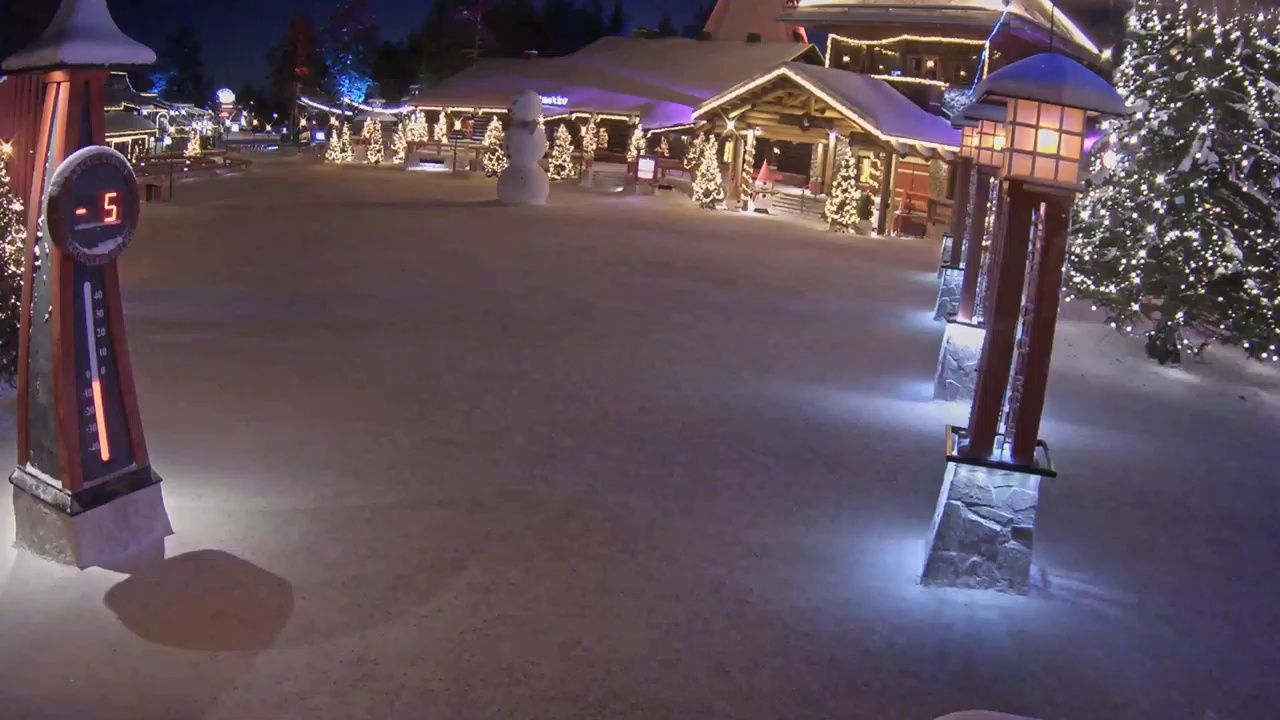

In [13]:
# Display the captured image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2025.02.12_06:48:59_Santa.jpg")

As such, GPT FC has successfully built a higher-level function of capturing an image from a location by chaining two primitive functions. For examples of constructing built-in functions or more complex frameworks, refer to our modules in `llmcam.vision` and `llmcam.utils`. For a full application, test our [deployed chatbot website](http://llmcam.ninjalabo.ai/) or run it locally with the function `llmcam.application.runner.run_llmcam`.

## TRANSCRIPT

In [14]:
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to help the user.
>> User:
What tools can you use?
>> Assistant:
I can use the following tools:  1. **functions.select_youtube_live_url**: This tool selects a
YouTube Live URL based on a specified location and optionally a provider.  2.
**multi_tool_use.parallel**: This tool allows for the execution of multiple tools in parallel,
specifically for tools in the `functions` namespace.  If you have any specific requests or need to
use these tools, please let me know!
>> User:
Can you provide me with a Youtube Live URL from Santa Claus Village?
>> Assistant:
Here is a YouTube Live URL from Santa Claus Village: [Watch
Live](https://www.youtube.com/watch?v=Cp4RRAEgpeU)
>> User:
Can you capture a frame from the Youtube Live URL of Santa Claus Village? Tell me the file path of
the captured frame.
>> Assistant:
I have captured a frame from the YouTube Live URL of Santa Claus Village. The file path of the
captured frame is: